Euler-Maruyama algorithm for the numerical solution of a stochastic differential equation
approximation error
strong and weak solution
Milstein algorithm.

In [50]:
import numpy as np
import scipy
import seaborn as sns
import math
import matplotlib.pyplot as plt

## Stochastic Integrals

In [43]:
N=10000
M=1
T = 1.0
dt = T / N

t = np.arange(0.0,1.0, dt)
dW = np.sqrt(dt)*np.random.randn(N,M)
W = np.cumsum(dW,axis=0)
e = np.array([[0]])
W_=np.concatenate((e,W[:-1]), axis=0)

ito = np.dot(W_.T,dW)
print("error ito integral = ", np.abs(ito - 0.5*(W[-1]**2 - T) )[0][0])
stratonovich = np.dot((0.5*(W_ + W) + 0.25*np.sqrt(dt)*np.random.randn(N,M)).T, dW)
print("error stratonovich = ", np.abs(stratonovich - 0.5*W[-1]**2)[0][0])

error ito integral =  0.0015556036176855303
error stratonovich =  0.0037032544718528237


averr =  0.03121816003829947


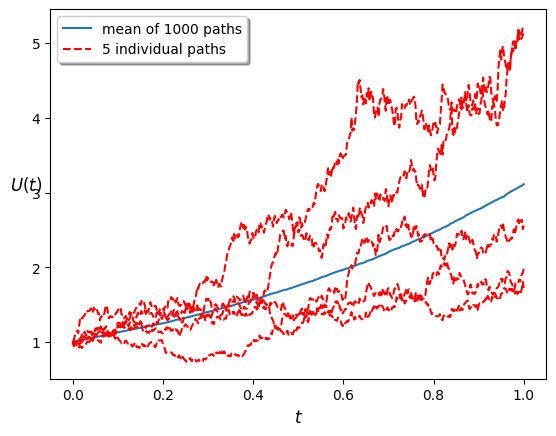

In [44]:
# Wiener Process
np.random.seed(100)
T=1
N=500 
dt=float(T)/N
t=np.linspace(0,T,N+1)

M=1000
dW=np.sqrt(dt)*np.random.randn(M,N)
W=np.cumsum(dW,1)
U=np.exp(np.tile(t[1:],(M,1))+0.5*W)
Umean=np.mean(U,axis=0)
Umean=np.insert(Umean,0,1)


plt.plot(t,Umean)
for i in range(5):
    plt.plot(t,np.concatenate(([1,],U[i,:])), 'r--')
plt.legend(('mean of 1000 paths', '5 individual paths'),loc=2,shadow=True)
plt.xlabel('$t$',fontsize=12); plt.ylabel('$U(t)$',fontsize=12,rotation=0)

averr = np.linalg.norm(Umean-np.exp(9*t/8),np.inf)
print ('averr = ', averr)

## Euler Maruyama Method

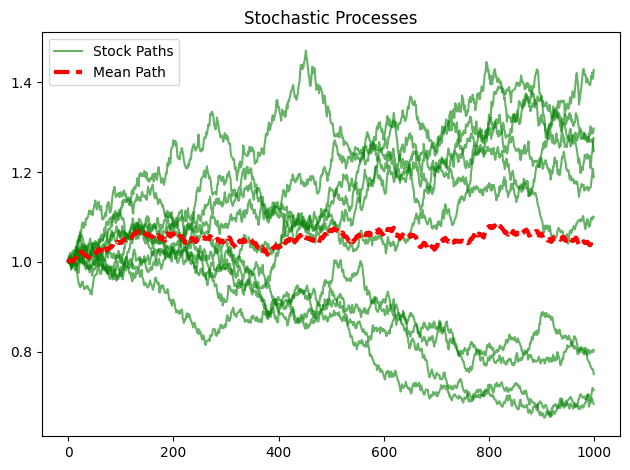

In [45]:
# GBM
mu = 0.1
sigma = 0.2
T = 1 
i = 1000 #No. timesteps - Method more accurate for lower timesteps
j = 10 #No. simulations
dt = T/i
S = np.zeros((i,j)) #for multiple runs, change to tuple (5,i)
S[0] = 1

for stock in range(j):
    dW = np.sqrt(dt)*np.random.standard_normal(i)
    for t in range(1,i):
        S[t][stock] = S[t-1][stock] * np.exp((mu-0.5*sigma**2)*dt+sigma*dW[t])

plt.plot(S[:,0], 'g', alpha=0.6,label='Stock Paths')
plt.plot(S[:,1:], 'g', alpha=0.6)
plt.plot(np.mean(S, axis=1), 'r--', lw=3,label ='Mean Path')
plt.title('Stochastic Processes')
plt.legend(loc=0)
plt.tight_layout()

Absolute error: 0.05087076396105994


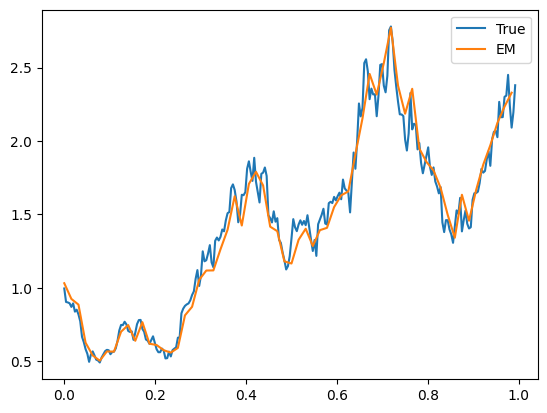

In [46]:
lambda_ = 2
mu = 1
Xzero = 1

T = 1
N = 2**8
dt = 1/N

t = np.arange(0.0,1.0, dt)
dW = np.sqrt(dt)*np.random.randn(N)
W = np.cumsum(dW)

Xtrue = Xzero*np.exp(((lambda_ - 0.5*mu**2)*t[1:])+(mu*W[:-1])) # true solution

R = 4
Dt = R*dt
L = int(N/R) # L EM steps of size Dt = R*dt
Xem = np.zeros(L)
Xtemp = Xzero
for j in range(L):
    Winc = np.sum(dW[R*(j-1):R*j])
    Xtemp = Xtemp + Dt*lambda_*Xtemp + mu*Xtemp*Winc
    Xem[j] = Xtemp
    
h1, = plt.plot(t[:-1], Xtrue, label="True")
h2, = plt.plot(np.arange(0.0, 1.0, R*dt), Xem, label="EM")
plt.legend(handles=[h1,h2])

emerr = np.abs(Xem[-1]-Xtrue[-1])
print(f'Absolute error: {emerr}')

## Approximation error

Text(0, 0.5, 'f')

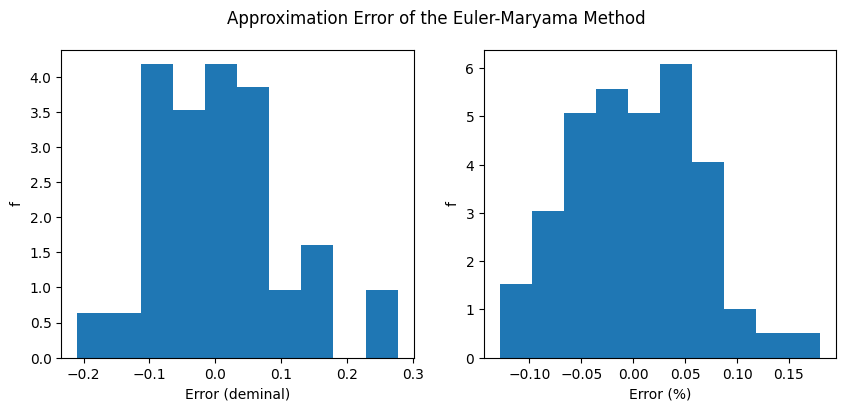

In [62]:
a_error = Xem-Xtrue[::4]
p_error = (Xem-Xtrue[::4])/Xtrue[::4]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
plt.suptitle('Approximation Error of the Euler-Maryama Method')
axes[0].hist(a_error, density=True, bins=10)
axes[0].set_xlabel('Error (deminal)')
axes[0].set_ylabel('f')

axes[1].hist(p_error, density=True, bins=10)
axes[1].set_xlabel('Error (%)')
axes[1].set_ylabel('f')

### Approx Error - Strong and weak convergence of the EM Method
For a given path of the Wiener processes Wt we call a solution Xt of (SDE) a strong solution. In case the Wiener process is free, Xt or (Xt, Wt) is called weak solution.
A method has strong convergence if there's a constant C such that EV of X - Xt <= C * SQRT(dt).

<>:38: SyntaxWarning: invalid escape sequence '\D'
<>:38: SyntaxWarning: invalid escape sequence '\D'
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_43574/2447264774.py:38: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta t$')
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_43574/2447264774.py:45: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sol, reisd, rank,s = np.linalg.lstsq(A,rhs)


[0.55025729] [0.00197391]


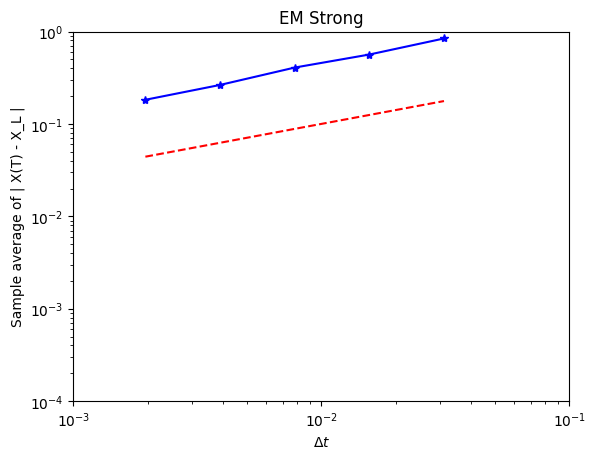

In [35]:
# test strong conververgence of Euler-Maruyama Method
# Solves dX = lambda*X dt + mu*X dW, X(0) = Xzero,
# where lambda = 2, mu = 1 and Xzer0 = 1.

# Discretized Brownian path over [0,1] has dt = 2^(-9).
# E-M uses 5different timesteps: 16dt, 8dt, 4dt, 2dt, dt.
# Examine strong convergence at T=1: E | X_L - X(T) |.

lambda_ = 2
mu = 1
Xzero = 1

T = 1
N = 2**9
dt = T/N
M = 1000
Xerr = np.zeros((M,5))
for s in range(M): 
    dW = np.sqrt(dt)*np.random.randn(N) # Brownian increments
    W = np.cumsum(dW) # discrete Brownian path
    Xtrue = Xzero*np.exp((lambda_ - 0.5*mu**2)+(mu*W[-1])) # true solution
    for p in range(5):
        R = 2**p
        Dt = R*dt
        L = int(N/R); # L Euler steps of size Dt = R*dt
        Xtemp = Xzero
        
        for j in range(L):
            Winc = np.sum(dW[R*j:R*(j+1)])
            Xtemp = Xtemp + Dt*lambda_*Xtemp + mu*Xtemp*Winc

        Xerr[s,p] = np.abs(Xtemp - Xtrue); # store the error att=1

Dtvals = dt*np.power(2,np.arange(5))
plt.loglog(Dtvals,np.mean(Xerr,axis=0),'b*-')# hold on
plt.loglog(Dtvals,(Dtvals**(0.5)),'r--')# hold off % reference slope of 1/2
plt.axis([1e-3,1e-1,1e-4,1])
plt.xlabel('$\Delta t$')
plt.ylabel('Sample average of | X(T) - X_L |')
plt.title('EM Strong')

# Least squares fit of error=C* Dt^q %%%%
A = np.concatenate( (np.ones((5,1)), np.log(Dtvals).reshape((5,1))), axis=1) 
rhs = np.log(np.mean(Xerr,axis=0)).reshape((5,1))
sol, reisd, rank,s = np.linalg.lstsq(A,rhs)
print(sol[1], reisd)

<>:30: SyntaxWarning: invalid escape sequence '\D'
<>:30: SyntaxWarning: invalid escape sequence '\D'
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_43574/1192022601.py:30: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta t$')


[0.93906388] [0.00891107]


/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_43574/1192022601.py:37: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sol, reisd, rank,s = np.linalg.lstsq(A,rhs)


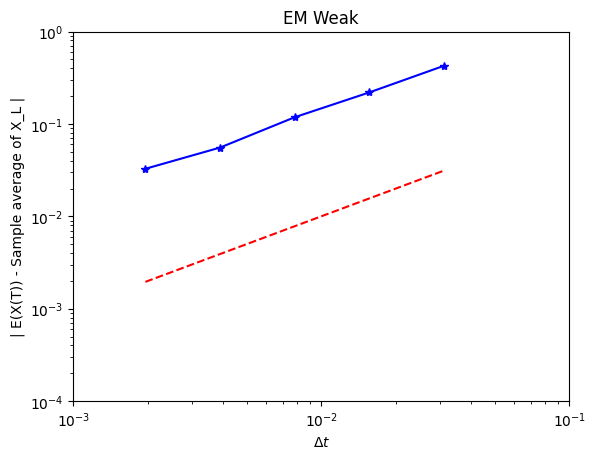

In [36]:
# EM WEAK: Test weak convergence of Euler-Maruyama
#
# Solves dX = lambda*X dt + mu*X dW, X(0) = Xzero,
# where lambda = 2, mu = 1 and Xzer0 = 1.
#
# E-M uses 5different timesteps: 2^(p-10), p = 1,2,3,4,5.
# Examine weak convergence at T=1: | E (X_L) - E (X(T)) |.

lambda_ = 2
mu = 0.1
Xzero = 1
T = 1
M = 50000 # number of paths sampled
Xem = np.zeros((5,1))
for p in range(5): # take various Euler timesteps
    Dt = 2**(p+1-10)
    L = int(T/Dt) # L Euler steps of size Dt
    Xtemp = Xzero*np.ones((M,1))
    for j in range(L):
        #Winc = np.sqrt(Dt)*randn(M,1)
        Winc = np.sqrt(Dt)*np.sign(np.random.randn(M,1)); ## use for weak E-M ##
        Xtemp = Xtemp + Dt*lambda_*Xtemp + mu*Xtemp*Winc
    Xem[p] = np.mean(Xtemp)
Xerr = np.abs(Xem - np.exp(lambda_))
Dtvals = np.power(2.0,(np.arange(1,6)-10))
plt.loglog(Dtvals,Xerr,'b*-')# hold on
plt.loglog(Dtvals,Dtvals,'r--')# hold off % reference slope of 1
plt.axis([1e-3, 1e-1, 1e-4, 1])
plt.xlabel('$\Delta t$')
plt.ylabel('| E(X(T)) - Sample average of X_L |')
plt.title('EM Weak')

#%%%% Least squares fit of error=C* dt^q %%%%
A = np.concatenate( (np.ones((5,1)), np.log(Dtvals).reshape((5,1))), axis=1) 
rhs = np.log(Xerr).reshape((5,1))
sol, reisd, rank,s = np.linalg.lstsq(A,rhs)
print(sol[1], reisd)

### Euler Discretization

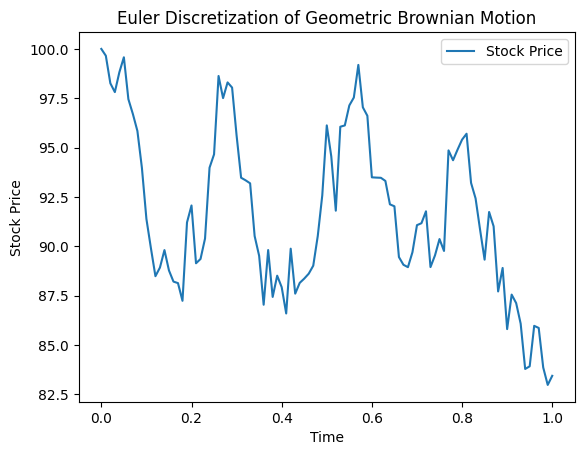

In [37]:
mu = 0.1        # Drift
sigma = 0.2     # Volatility
S0 = 100        # Initial stock price
T = 1           # Total time
dt = 0.01       # Time step
num_steps = int(T / dt)  # Number of time steps

# Generate Wiener increments
dW = np.sqrt(dt) * np.random.normal(size=num_steps)

# Initialize arrays
t_values = np.linspace(0, T, num_steps + 1)
S_values = np.zeros(num_steps + 1)
S_values[0] = S0

# Euler discretization
for i in range(1, num_steps + 1):
    dS = mu * S_values[i - 1] * dt + sigma * S_values[i - 1] * dW[i - 1]
    S_values[i] = S_values[i - 1] + dS

# Plot the results
plt.plot(t_values, S_values, label='Stock Price')
plt.title('Euler Discretization of Geometric Brownian Motion')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

## Milstein's Higher Order Method
It is possible to raise strong order of convergence for Euler-Maryama method by adding a correction to stochastic increment, giving a Milstein method:
$$X_j = X_{j-1} + \Delta t f(X_{j-1}) + g(X_{j-1})(W(\tau_j)-W(\tau_{j-1})) + \frac{1}{2} g(X_{j-1})g'(X_{j-1})((W(\tau_j)-W(\tau_{j-1}))-\Delta t), j=1,2..., L $$
Milstein method arises from applying $It\hat{o}$ lemma. Further let's evaluate milstein method by applying it to the following stochastic equation:
$$ dX(t)=tX(t)(K-X(t))dt + \beta X(t)dW(t), X(0)=X_0 $$

<>:33: SyntaxWarning: invalid escape sequence '\D'
<>:33: SyntaxWarning: invalid escape sequence '\D'
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_43574/3780449627.py:33: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta t$');


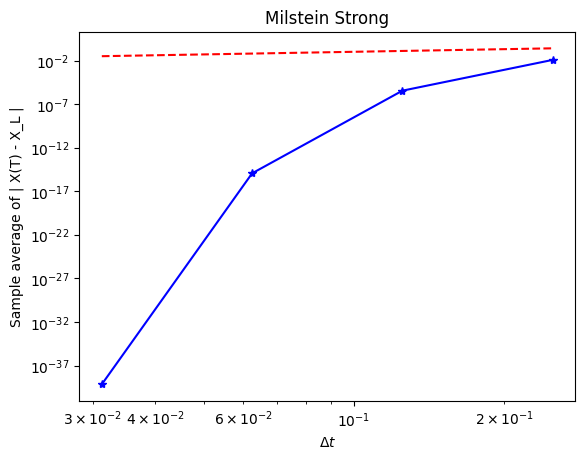

In [38]:
r=2
K=1
beta=0.25
Xzero=0.5
T=1.0
N=2**9
dt=T/N
M=500
R=np.array([1, 16, 32, 64, 128])

#t = np.arange(0.0,T, dt);
dW = np.sqrt(dt)*np.random.randn(M,N)
Xmil=np.zeros((M, len(R)))

for p in range(len(R)):
    L=int(N/R[p])
    Dt=R[p]*dt
    Xtemp = Xzero * np.ones((M,1))
    for j in range(int(L)):
        Winc = np.sum(dW[:, R[p]*j:R[p]*(j+1)], axis=1).reshape((500,1))
        Xtemp = Dt*r*Xtemp*(K-Xtemp) + (beta*Xtemp*Winc) + (0.5*(beta**2.0)*Xtemp*((Winc**2.0) - Dt))
    Xmil[:,p]=Xtemp.reshape(M)

import numpy.matlib

Xref = Xmil[:,0]
Xerr = np.abs(Xmil[:,np.arange(1,len(R))] - numpy.matlib.repmat(Xref.reshape((M,1)),1,4))
Xerr_mean = np.mean(Xerr, axis=0)
Dtvals = dt*R[1:5]; 
plt.loglog(Dtvals,Xerr_mean, "b*-")
plt.loglog(Dtvals,Dtvals, "r--")
plt.title('Milstein Strong')
plt.xlabel('$\Delta t$')
plt.ylabel('Sample average of | X(T) - X_L |')